# R kernel

In [1]:
suppressMessages({
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggpubr)
library(cowplot)
library(rstatix)
library(ggrepel)
library(reshape2)
library(ggnewscale)
library(RColorBrewer)
library(ComplexHeatmap)
})

In [2]:
mytheme = function(){
theme_bw() +
theme(axis.text.x=element_text(size=6,color='black'),
    axis.text.y=element_text(size=6,color="black"),
    axis.title.y=element_text(size=6,color="black"),
    axis.title.x=element_text(size=6,color="black"),
    #axis.ticks.x=element_blank(),
    axis.ticks.length=unit(.02, "in"),
    axis.line = element_line(color = "black", linewidth = 0.25),
    axis.ticks = element_line(color = "black", linewidth = 0.25),
    strip.text.x = element_text(size = 6,margin = margin(0.08,0,0.08,0, "cm")),
    strip.text.y = element_text(size = 6,margin = margin(0,0.08,0,0.08, "cm")),
    strip.background=element_rect(linewidth=0.25),
    legend.text=element_text(size=5,color="black"),
    legend.title=element_text(size=5,color="black"),
    legend.key.width=unit(0.2,'cm'),
    legend.key.height=unit(0.2,'cm'),
    legend.box.margin=margin(0,0,0,2),
    legend.box.spacing = unit(0, "pt"),
    panel.spacing = unit(0.1, "cm"),
    plot.title = element_text(size=6),
    panel.border = element_rect(linewidth=0.25,color="black"),
    panel.grid = element_blank()
)
}

## Fig.4B

In [3]:
Immu_cell = c('T cells','NK cells','B cells','Plasma cells','Macrophage/DC','Mast cells')

In [4]:
Immu_dist = read.csv("Immune_cell2BM_distance.csv",head=T)
Immu_dist = Immu_dist[Immu_dist$group != 'HC',]
Immu_dist$Depth_bin = factor(Immu_dist$Depth_bin, levels=c('0-250', '250-500', '500-750', '750-1000', '1000-1250','1250-1500','>1500'))
Immu_dist$celltype = factor(Immu_dist$celltype, levels=Immu_cell)

In [5]:
mean_sd <- Immu_dist %>%
  group_by(celltype,group, Depth_bin) %>%
  summarize(mean = mean(proportion), 
            sd = sd(proportion),
            sem = sd / sqrt(n())
           )

`summarise()` has grouped output by 'celltype', 'group'. You can override using
the `.groups` argument.


In [8]:
test_result = Immu_dist %>%
  as.data.frame() %>%
  setNames(make.names(names(.), TRUE)) %>%
  group_by(celltype) %>%
  dunn_test(proportion ~ Depth_bin)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


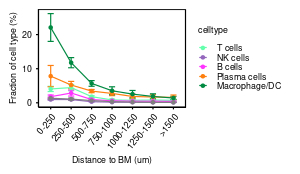

In [175]:
plot = ggline(Immu_dist, x="Depth_bin", y="proportion", add=c("mean_se"),  error.plot = "errorbar", 
            add.params = list(size = 1, width = 0.3),color = "celltype", palette = celltype_color, shape=20, stroke=NA, size=0.25,
            point.size = 0.3, nrow=1) + 
    labs(x='Distance to BM (um)', y='Fraction of cell type (%)') +
    mytheme() +
    theme(axis.text.x=element_text(size=5,color="black",angle=50,hjust=1,vjust=1),
        plot.title=element_text(size=5,color="black"),
        strip.background=element_rect(size=0.25, color='black', fill="white"),
        panel.spacing = unit(0.15, "cm"),
        legend.position = "right"
    )

options(repr.plot.width =2.5,repr.plot.height =1.45)
plot

## Fig.4D

In [4]:
merge_leiden_cluster = read.csv("Immu_Merge_leiden_cluster_metadata.csv",head=T)
merge_leiden_cluster$group = factor(merge_leiden_cluster$group, levels=c("HC",'DLE','SLE'))

In [5]:
celltype_color = c(
    "T cells" = "#63FFAC",
    "NK cells" = "#9467BD" ,
    "B cells" = "#FF34FF",
    "Plasma cells" = "#FF7F0EFF",
    "Macrophage/DC" = "#008941"
)

In [6]:
cluster_stats <- merge_leiden_cluster %>%
  group_by(leiden_merged_1, celltype) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)
cluster_stats$celltype = factor(cluster_stats$celltype , levels=names(celltype_color))

`summarise()` has grouped output by 'leiden_merged_1'. You can override using
the `.groups` argument.


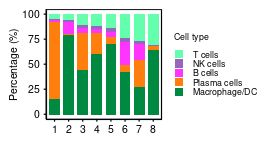

In [7]:
cluster_plot = ggplot(cluster_stats,aes(x=as.character(leiden_merged_1),y=percentage,fill=celltype)) +
    geom_bar(stat = "identity",width=0.7) +
    labs(x="",y="Percentage (%)",fill="Cell type") +
    #guides(fill = guide_legend(override.aes = list(size=2), ncol = 1, title = 'Cell type')) +
    scale_fill_manual(values=celltype_color) +
    mytheme()
options(repr.plot.width= 2.3,repr.plot.height = 1.35)
cluster_plot

## Fig.4E

In [8]:
leiden_merged_colors = c(
 '1'= '#59a14f',
 '2'= '#76b7b2',
 '3'= '#ff9da7',
 '4'= '#e15759',
 '5'= '#4e79a7',
 '6'= '#b07aa1',
 '7'= '#f28e2b',
 '8'= '#9c755f')

In [9]:
group_stats <- merge_leiden_cluster %>%
  group_by(group,leiden_merged_1) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)
group_stats$group = factor(group_stats$group, levels=c("HC","DLE","SLE"))

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


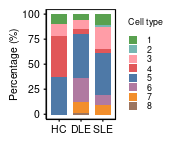

In [10]:
group_plot = ggplot(group_stats,aes(x=group,y=percentage,fill=as.character(leiden_merged_1))) +
    geom_bar(stat = "identity",width=0.7) +
    labs(x="",y="Percentage (%)",fill="Cell type") +
    scale_fill_manual(values=leiden_merged_colors) +
    mytheme()
options(repr.plot.width= 1.5,repr.plot.height = 1.35)
group_plot

## Fig.4F

In [200]:
celltype = c('T cells', 'NK cells','B cells','Plasma cells','Macrophage/DC')

In [201]:
sample_stats <- merge_leiden_cluster %>%
  group_by(leiden_merged_1,celltype,sample) %>%
  summarise(count = n(), .groups = 'drop') %>%
  complete(leiden_merged_1, nesting(sample, celltype), fill = list(count = 0)) %>%
  group_by(sample) %>%
  mutate(percentage = count / sum(count)*100)

sample_stats <- sample_stats %>%
  mutate(percentage = ifelse(is.na(percentage), 0, percentage))

In [202]:
samples = c('HC1', 'HC2','HC3', 'HC4', 'DLE1','DLE2','DLE3','DLE4','DLE5','SLE1','SLE2','SLE3','SLE4','SLE5','SLE6')
clusters = c(1:8)
samples_list <- unlist(
  lapply(clusters, function(cl) {
    paste(samples, cl, sep = "_")
  })
)

In [203]:
sample_stats$id = paste0(sample_stats$sample, "_", sample_stats$leiden_merged_1)
short_data <- as.data.frame(pivot_wider(sample_stats,id_cols=celltype, names_from = id, values_from = percentage))
rownames(short_data) = short_data$celltype
short_data <- short_data[match(celltype,rownames(short_data)),]
short_data = short_data[,!colnames(short_data) %in% c("celltype",'group')]
short_data <- short_data[, sapply(short_data, function(x) sum(x) != 0)]
samples_list = samples_list[samples_list %in% colnames(short_data)]
short_data <- short_data[,match(samples_list,colnames(short_data))]
short_data <- short_data %>%
  mutate(across(where(is.numeric), ~replace(., . > 10, 10)))

In [204]:
cluster_col <- rep(1:8, c(14,1,14,15,15,6,9,1))
sample_order = gsub("_\\d+", "", samples_list)

HC_color = brewer.pal(4,'Reds')
DLE_color = brewer.pal(5,'Greens')
SLE_color = brewer.pal(6,'Blues')
sample_color = setNames(c(HC_color,DLE_color,SLE_color), samples)

top_annotation = HeatmapAnnotation(
    cluster = cluster_col, 
    sample = sample_order, 
    simple_anno_size = unit(1.5, 'mm'), 
    col = list(cluster = leiden_merged_colors, sample=sample_color),
    annotation_name_side = "left",
    annotation_name_gp = gpar(fontsize = 5),
    annotation_legend_param = list(
        sample = list (
            title_gp = gpar(fontsize = 5), 
            labels_gp = gpar(fontsize = 5),
            grid_height = unit(3,'mm'),
            grid_width = unit(3,'mm')    
        ),
        cluster = list(
            title_gp = gpar(fontsize = 5), 
            labels_gp = gpar(fontsize = 5),
            grid_height = unit(3,'mm'),
            grid_width = unit(3,'mm')
        )
    )
)

celltype_order <- rep(celltype, c(1,1,1,1,1))

row_annotation = rowAnnotation(
    Celltype = celltype_order, 
    simple_anno_size = unit(1.5, 'mm'), 
    col = list(Celltype = celltype_color),
    annotation_name_gp = gpar(fontsize = 5),
    annotation_legend_param = list(
        Celltype = list(
            title_gp = gpar(fontsize = 5), 
            labels_gp = gpar(fontsize = 5),
            grid_height = unit(3,'mm'),
            grid_width = unit(3,'mm')
        )
    )
) 

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


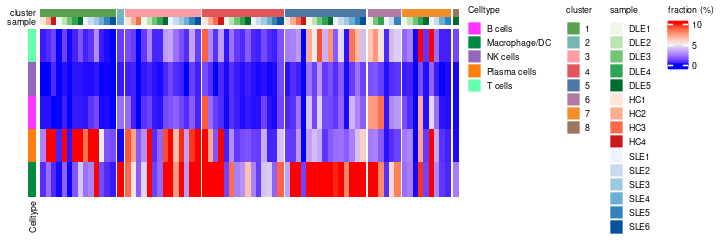

In [205]:
plot = Heatmap(short_data,cluster_rows = F,
        cluster_columns = F, 
        heatmap_legend_param = list(
            title = "fraction (%)",
            legend_height = unit(1, "cm"),
            legend_width = unit(1.5, "cm"),
             #grid_width = unit(4, "cm"),
            #title_position = "leftcenter-rot",
            #direction = "horizontal",
            annotation_legend_side = "bottom",
            heatmap_legend_side = "bottom",
            labels_gp=gpar(fontsize=5),
            title_gp=gpar(fontsize=5)
        ),
        column_title = NULL,
        show_column_names = FALSE,
        show_row_names = FALSE,
        row_names_gp = gpar(fontsize = 5),
        column_names_gp = gpar(fontsize = 5),
        column_split = rep(1:8, c(14,1,14,15,15,6,9,1)),
        column_gap = unit(0.5, "mm"),
        row_names_side = "left",
        top_annotation = top_annotation,
        left_annotation = row_annotation ,
        na_col = "gray"
        )
options(repr.plot.width= 6,repr.plot.height = 2)
draw(plot, merge_legend = TRUE)

## Fig.4H

In [29]:
TLS_score = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Immu_Merge_leiden_cluster_metadata_TLS_score_1.csv",head=T)
TLS_score$group = factor(TLS_score$group, levels=c("HC","DLE","SLE"))

In [30]:
TLS_score = TLS_score %>% dplyr::select("leiden_merged_1","Wu_TLS","group")

In [31]:
TLS_score <- rbind(TLS_score, 
             data.frame(leiden_merged_1 = c("2","2","6","7","8","8"),
                        Wu_TLS = 0.1,
                        group = c("HC","DLE","HC","HC","HC","SLE")))

In [32]:
TLS_score$leiden_merged_1 = factor(TLS_score$leiden_merged_1, levels = c("1","2","3","4","5","6","7","8"))

In [33]:
background_colors <- rep(c("lightgray", "white"), 4)
cluster_bg <- data.frame(
  cluster = levels(TLS_score$leiden_merged_1),
  ymin = -Inf,
  ymax = Inf,
  xmin = 1:length(unique(TLS_score$leiden_merged_1)) - 0.5,
  xmax = 1:length(unique(TLS_score$leiden_merged_1)) + 0.5,
  bg_color = background_colors
)

In [34]:
y_min <- min(TLS_score$Wu_TLS, na.rm = TRUE)

In [37]:
mean(TLS_score$Wu_TLS)

[1] 0.156158

Warning message:
“Cannot compute density for groups with fewer than two datapoints.”
Warning message:
“Cannot compute density for groups with fewer than two datapoints.”


png 
  2

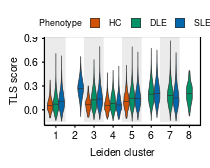

In [41]:
group_color = c('HC' = '#d05204', 'DLE' = '#019167', 'SLE' = '#0166aa')
plot = ggplot() +
    geom_rect(data = cluster_bg,aes(xmin = xmin,xmax = xmax,ymin = y_min,ymax = Inf,fill = bg_color),alpha = 0.3,inherit.aes = FALSE, show.legend = FALSE) +
    scale_fill_manual(values = c('gray' , 'white'),name=NULL)+
    new_scale_fill()+
    geom_violin(data = TLS_score, aes(x=as.character(leiden_merged_1),y=Wu_TLS,fill=group), scale='width', lwd=0.15,draw_quantiles = 0.5, drop=FALSE) + 
    labs(x="Leiden cluster",y='TLS score') +
    scale_fill_manual(values=group_color, name = "Phenotype") +
    mytheme() +
    theme(legend.position = 'top')

options(repr.plot.width =1.75,repr.plot.height = 1.4)
plot

pdf("../../figures/Cellbin_leiden_merged_cluster_TLS_score_vlnplot.pdf",w=1.75,h=1.4)
plot
dev.off()

## Fig.4K

In [11]:
RCLASI = read.table("RCLASI_all_sample.txt",head=T)
RCLASI = RCLASI[RCLASI$Sequence_type == 'Stereo-seq',]

In [12]:
TLS_num = read.csv("cluster_6_7_num.txt",head=T,sep="\t")
TLS_num = merge(RCLASI, TLS_num, by='sample')
TLS_num$Duration_of_lesions = as.numeric(TLS_num$Duration_of_lesions)

`geom_smooth()` using formula = 'y ~ x'


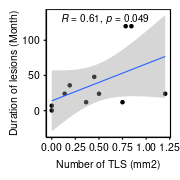

In [16]:
plot = ggplot(TLS_num, aes(x=TLS_density, y=Duration_of_lesions)) + 
    geom_point(shape=19, stroke=NA, size=1) +
    geom_smooth(method=lm, lwd=0.25) +
    stat_cor(label.x = 0.1,label.y = 130,size=2, method = 'spearman') +
    labs(y= 'Duration of lesions (Month)', x = 'Number of TLS (mm2)') + 
    mytheme()
options(repr.plot.width= 1.5,repr.plot.height = 1.5)
plot

## Fig.4L

In [17]:
DEG = read.table("TLS_DEG_pct0.05.txt",head=T)
label = read.table("label_gene.txt",head=T)

In [18]:
Both_non_DEG = DEG[(abs(DEG$avg_log2FC) < 0.25) | DEG$p_val_adj > 0.05, ]
TLS_DEG = DEG[DEG$avg_log2FC > 0.25 & DEG$p_val_adj < 0.05, ]
TLS_buffer_DEG = DEG[DEG$avg_log2FC < -0.25 & DEG$p_val_adj < 0.05, ]
label_data = DEG[DEG$gene %in% label$gene,]

png 
  2

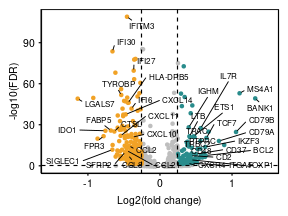

In [28]:
plot = ggplot() +
    geom_point(data = Both_non_DEG, aes(x = avg_log2FC, y=-log10(p_val_adj)),  shape=19,size=1,stroke=NA, color = 'gray') + 
    geom_point(data = TLS_DEG,aes(x = avg_log2FC, y=-log10(p_val_adj)), shape=19,size=1,stroke=NA, color='#298c8c') +
    geom_point(data = TLS_buffer_DEG,aes(x = avg_log2FC, y=-log10(p_val_adj)), shape=19,size=1,stroke=NA, color='#f1a226') +
    geom_text_repel(data= label_data, aes(x = avg_log2FC, y=-log10(p_val_adj), label=gene), color="black",size = 1.6,
        box.padding = unit(0.2, "lines"),nudge_y = 0.1,nudge_x=0.1,point.padding = unit(0, "lines"),segment.colour = "black", min.segment.length = unit(0, 'lines'),
        segment.size = 0.2,max.overlaps = Inf) +
    labs(x= "Log2(fold change)",y="-log10(FDR)") + 
    geom_hline(yintercept = 0.05, lwd=0.25, lty=2) +
    geom_vline(xintercept = 0.25, lwd=0.25, lty=2) + 
    geom_vline(xintercept = -0.25, lwd=0.25, lty=2) +
    xlim(c(-1.5,1.5)) +
    mytheme()

options(repr.plot.width =2.4,repr.plot.height =1.8)
plot

pdf("../../figures/TLS_TLS_buffer_DEG_VolcanoPlot.pdf",w=2.4,h=1.8)
plot
dev.off()

## Fig.4M

In [19]:
TLS_DEG_GO = read.table("TLS_DEG_GO_select.txt",head=T,sep="\t")

In [20]:
Des_order = c(
    "lymphocyte activation",
    "B cell activation",
    "antigen receptor-mediated signaling pathway",
    "immune response-activating signaling pathway",
    "hematopoietic or lymphoid organ development",
    "positive regulation of cell migration",
    "positive regulation of locomotion",
    "antigen processing and presentation of peptide antigen via MHC class II",
    "chemotaxis",
    "regulation of cell-cell adhesion"
)
TLS_DEG_GO$Description = factor(TLS_DEG_GO$Description, levels=rev(Des_order))
TLS_DEG_GO$Log_q_value = ifelse(TLS_DEG_GO$GeneList == 'TLS+', -(TLS_DEG_GO$Log_q_value), TLS_DEG_GO$Log_q_value)

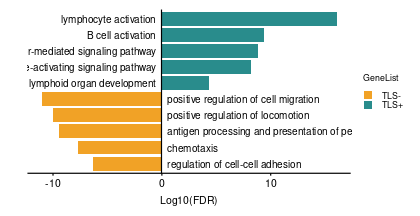

In [22]:
color = c('TLS+'='#298c8c', 'TLS-'='#f1a226')
plot = ggplot(data = TLS_DEG_GO, aes(x = Description, y = Log_q_value, fill=GeneList))+
    geom_bar(stat = "identity", width=0.8) + 
    geom_text(data =TLS_DEG_GO[TLS_DEG_GO$GeneList=='TLS-',], aes(label = Description, y = 0.5), vjust = 0.5, hjust=0, size=2) +
    geom_text(data =TLS_DEG_GO[TLS_DEG_GO$GeneList=='TLS+',], aes(label = Description, y = -0.5), vjust = 0.5, hjust=1, size=2) +
    geom_hline(yintercept = 0, lwd=0.25, lty=1) +
    scale_fill_manual(values=color) +
    labs(x="",y='Log10(FDR)') +
    coord_flip() +
    mytheme() +
    theme(axis.text.y=element_blank(),
         axis.ticks.y=element_blank(),
          panel.border = element_blank(),
          axis.line.y=element_blank()
    )

options(repr.plot.width =3.5,repr.plot.height =1.8)
plot

# Python kernel

In [8]:
import scanpy as sc
import anndata as ad
import pandas as pd
from shapely.geometry import GeometryCollection, Polygon
import matplotlib.backends.backend_pdf as pdf_backend
import importlib

import utils_20250718
importlib.reload(utils_20250718)
from utils_20250718 import *

In [5]:
ST_adata = sc.read_h5ad('/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Cellbin_h5ad_raw/All_samples_Cellbin_filter_gene200_add_anno_dist.h5ad')
sc.pp.normalize_total(ST_adata, target_sum=10000)
sc.pp.log1p(ST_adata)

In [2]:
celltype_color = {
    "Keratinocytes" :"#CCFF00FF",
    "Melanocytes" : "#FF4A46",
    "Schwann cells" : "#A30059",
    "Sweat gland cells" : "#006FA6",
    "Fibroblasts" : "#8FB0FF",
    "Endothelial cells" :"#B79762",
    "Smooth muscle cells" :"#6B7900",
    "T cells" : "#63FFAC",
    "NK cells" : "#9467BD" ,
    "B cells" : "#FF34FF",
    "Plasma cells" :"#FF7F0EFF",
    "Macrophage/DC" : "#008941",
    "Mast cells" : "#6A3A4C"
}

## Fig.4A

In [6]:
Immu_cell = ['T cells','NK cells','B cells','Plasma cells','Macrophage/DC',"Mast cells"] 

In [7]:
HF_nich_cell = ["IRS","ORS","OB","HF-SG"]
ST_adata_change_cell = ST_adata.copy()
ST_adata_change_cell.obs['celltype'] = ST_adata_change_cell.obs['celltype'].cat.add_categories(['HF niche'])
ST_adata_change_cell.obs.loc[ST_adata_change_cell.obs['subtype'].isin(HF_nich_cell), 'celltype'] = 'HF niche'
ST_adata_change_cell.obs['celltype'] = ST_adata_change_cell.obs['celltype'].cat.add_categories(['Immune niche'])
ST_adata_change_cell.obs.loc[ST_adata_change_cell.obs['celltype'].isin(Immu_cell), 'celltype'] = 'Immune niche'

In [8]:
BM_shp_file = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Tissue_line/SHP_file/SLE2_BM_tussue_contour.shp")
SLE2_adata = ST_adata_change_cell[ST_adata_change_cell.obs['sample'] == 'SLE2']

[11:22:27] ❕  ssat is not registered, register now                                           ]8;id=747119;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=496591;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


[11:22:28] 📃  add palette for `celltype` to adata.uns                                       ]8;id=880050;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=961014;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#1526\1526]8;;\

<Axes: >

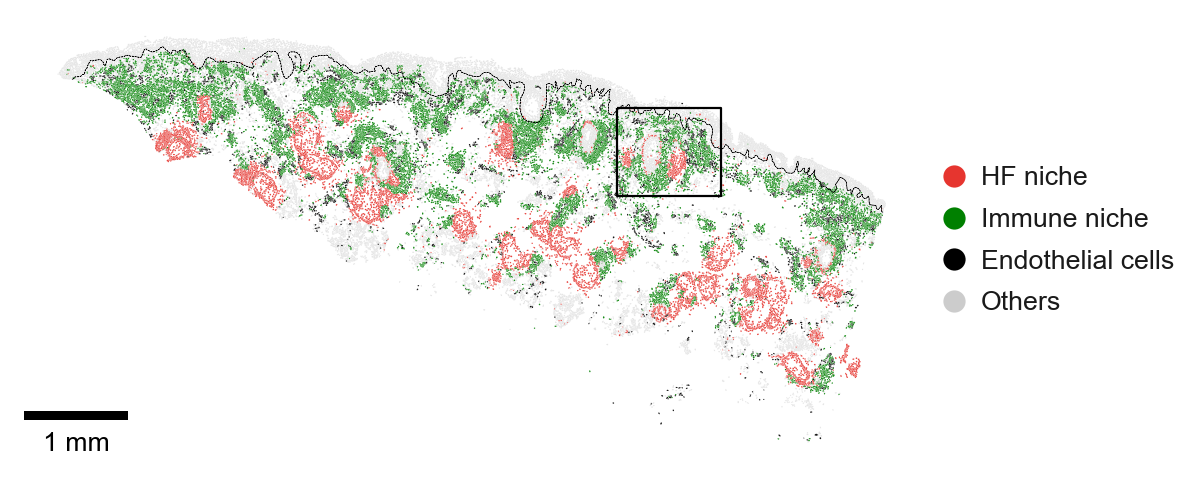

In [29]:
color = {
    'Endothelial cells' : 'black',
    'HF niche' : '#E6352F',
    'Immune niche' : 'green'
    }

polygon = Polygon([[20500,17000], [22500,17000],[22500,15300], [20500,15300]])

ax = dimplot(SLE2_adata,height = 7, background=True, reduction="contour",groupby='celltype', 
        order=['HF niche','Immune niche','Endothelial cells'], legend=True, palette = color)
draw_scalebar(ax=ax, location='lower left', color='black')
gpd.GeoSeries(polygon).plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1)
BM_shp_file.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=0.25, linestyle='--')

/tmp/ipykernel_42369/1201344601.py:16: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  SLE2_adata.obs['subtype'] = SLE2_adata.obs['subtype'].cat.add_categories(['Immune niche'])


[17:44:44] 📃  Filtering contour within bounding box [20500, 15300, 22500, 17000]            ]8;id=896419;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=735854;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=194492;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=897589;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


           📃  add palette for `subtype` to adata.uns                                        ]8;id=995482;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=640188;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#1526\1526]8;;\

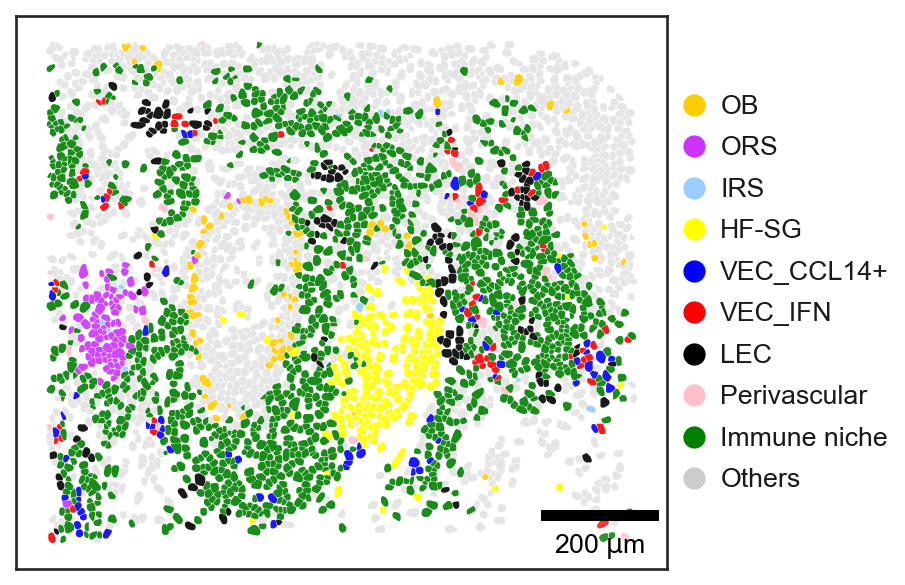

In [9]:
color = {
    'HF-SG' : '#FFFF00',#'red',
    'OB' : '#FFCC00',
    'IRS' : '#99CCFF',
    'ORS' : '#CC33FF', 
    'VEC_CCL14+' : 'blue',
    'VEC_IFN' : '#FF0000',   
    'LEC' : 'black',
    'Perivascular' : 'pink',
    'Immune niche' : 'green',   
}

zone = [20500,15300,22500,17000]

mask = SLE2_adata.obs['celltype'] == 'Immune niche'
SLE2_adata.obs['subtype'] = SLE2_adata.obs['subtype'].cat.add_categories(['Immune niche'])
SLE2_adata.obs.loc[mask, 'subtype'] = 'Immune niche'

zone_adata = within(SLE2_adata, zone, reduction='contour', inplace=True)

ax = dimplot(zone_adata, background=True, reduction="contour", groupby='subtype',height = 5,legend=True, palette =color,
    order=['OB','ORS','IRS','HF-SG','VEC_CCL14+','VEC_IFN','LEC','Perivascular','Immune niche'] )
draw_scalebar(ax=ax, location='lower right', color='black')
sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)

## Fig.4C

In [36]:
SLE2_adata = ST_adata[ST_adata.obs['sample'] == 'SLE2']

[11:34:21] 📃  Filtering contour within bounding box [14500, 14200, 16500, 18300]            ]8;id=4214;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=799537;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=942706;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=48438;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


           📃  add palette for `celltype` to adata.uns                                       ]8;id=839703;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=712731;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#1526\1526]8;;\

(14180.0, 18320.0)

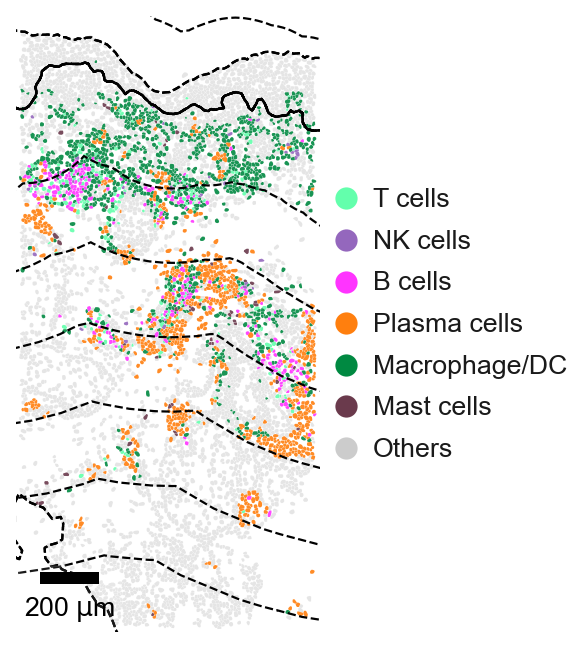

In [47]:
zone = [14500,14200,16500,18300]

shp1 = gpd.read_file(f"SLE2_Epi_tussue_contour.shp")
shp2 = gpd.read_file(f"SLE2_BM_tussue_contour.shp")
shp3 = gpd.read_file(f"SLE2_Der_tussue_contour.shp")

zone_adata = within(SLE2_adata, zone, reduction='contour', inplace=True)
    
ax = dimplot(zone_adata, background=True, height=5, reduction="contour", order=Immu_cell, groupby='celltype',legend=True, palette = celltype_color)
draw_scalebar(ax=ax, location='lower left', color='black')
shp1.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1, linestyle='--')
shp2.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1, linestyle='--')
shp2.buffer(500).plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1, linestyle='--')
shp2.buffer(1000).plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1, linestyle='--')
shp2.buffer(1500).plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1, linestyle='--')
shp2.buffer(2000).plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1, linestyle='--')
shp2.buffer(2500).plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1, linestyle='--')
shp2.buffer(3000).plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1, linestyle='--')
shp3.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1, linestyle='--')
ax.set_xlim([zone[0]-20,zone[2]+20])
ax.set_ylim([zone[1]-20,zone[3]+20])

## Fig.4G

In [5]:
merge_cluster_adata = sc.read("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Immu_Merge_leiden_cluster_metadata.h5ad")

In [6]:
leiden_merged_color = {
 '1': '#59a14f',
 '2': '#76b7b2',
 '3': '#ff9da7',
 '4': '#e15759',
 '5': '#4e79a7',
 '6': '#b07aa1',
 '7': '#f28e2b',
 '8': '#9c755f'}

[21:00:55] ❕  ssat is not registered, register now                                           ]8;id=44553;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=630061;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


           ❕  ssat is not registered, register now                                           ]8;id=70491;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=668453;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


           📃  add palette for `leiden_merged_1` to adata.uns                                ]8;id=503462;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=844249;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#1526\1526]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=890491;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=856735;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


[21:00:56] ❕  ssat is not registered, register now                                           ]8;id=45803;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=781815;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


           📃  add palette for `leiden_merged_1` to adata.uns                                ]8;id=515929;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=830723;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#1526\1526]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=473960;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=628176;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


[21:00:57] ❕  ssat is not registered, register now                                           ]8;id=110208;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=12365;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


           📃  add palette for `leiden_merged_1` to adata.uns                                ]8;id=905783;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=825492;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#1526\1526]8;;\

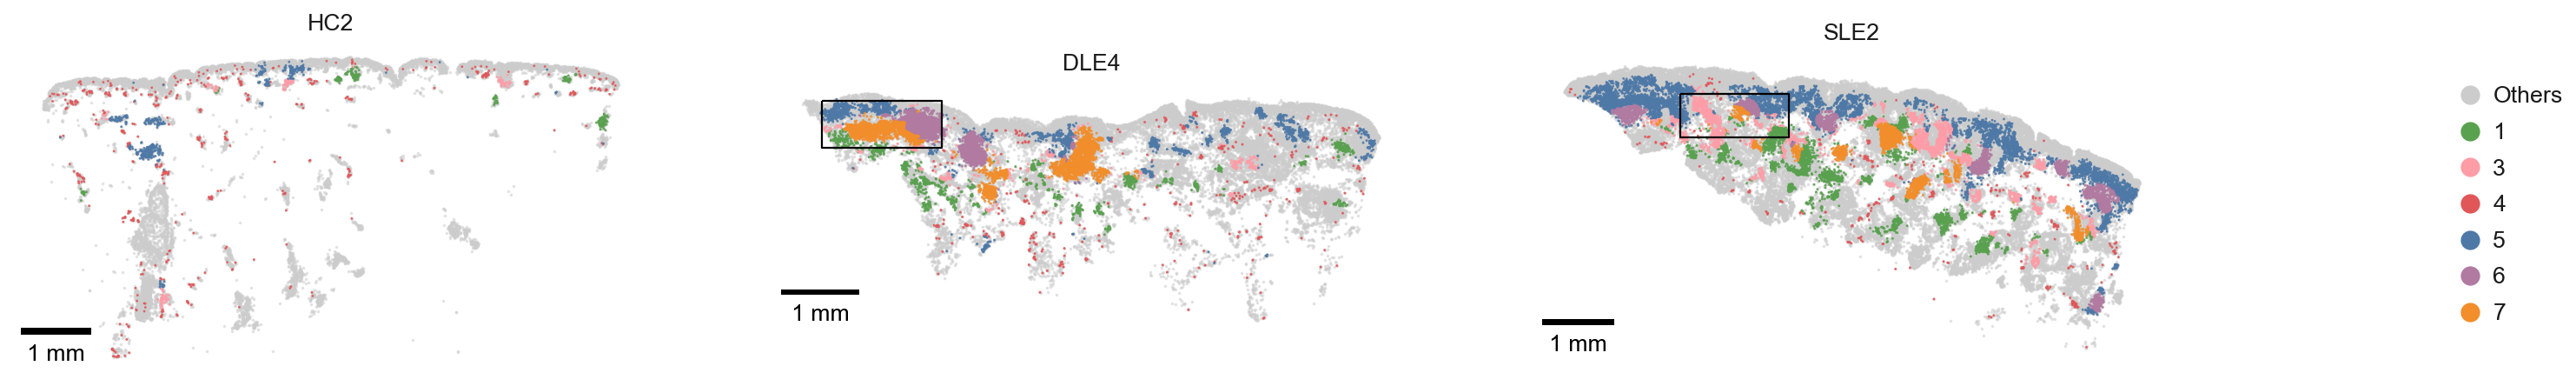

In [8]:
polygons = {
    'DLE4' : [Polygon([[6000,17100], [9100,17100],[9100,15900], [6000,15900]])],
    'SLE2' : [Polygon([[13000,17600], [16000,17600],[16000,16400], [13000,16400]])]
}

fig, axs =plt.subplots(figsize=(20, 4), ncols=3,nrows=1) 
axs = axs.flatten()

samples = ['HC2','DLE4',"SLE2"]
for i, sample in enumerate(samples):
    sample_adata_immu = merge_cluster_adata[merge_cluster_adata.obs['sample'].str.contains(sample)]
    sample_adata = ST_adata[ST_adata.obs['sample'] == sample]
    ax = dimplot(sample_adata, reduction="spatial", dot_size=10,  legend=False, ax=axs[i])
    dimplot(sample_adata_immu, groupby="leiden_merged_1", reduction="spatial", ax=ax, dot_size=50, legend=False, palette=leiden_merged_color)
    ax.set_title(sample)
    draw_scalebar(ax=ax, location='lower left',color='black')
    if sample == 'DLE4' or sample =='SLE2':
        polygon = polygons[sample]
        gpd.GeoSeries(polygon).plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1)
plot_legend(fig=fig)

[12:04:48] 📃  Filtering contour within bounding box [6000, 15900, 9100, 17100]              ]8;id=853009;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=952467;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=403916;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=671830;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


[12:04:49] 📃  add palette for `celltype` to adata.uns                                       ]8;id=70957;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=85346;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#1526\1526]8;;\

[12:04:50] 📃  Filtering contour within bounding box [13000, 16400, 16000, 17600]            ]8;id=32066;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=887876;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=883942;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=30449;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#286\286]8;;\

/share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py:287: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['ssat'] = SSAT_PARAMS


           📃  add palette for `celltype` to adata.uns                                       ]8;id=169201;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=755741;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#1526\1526]8;;\

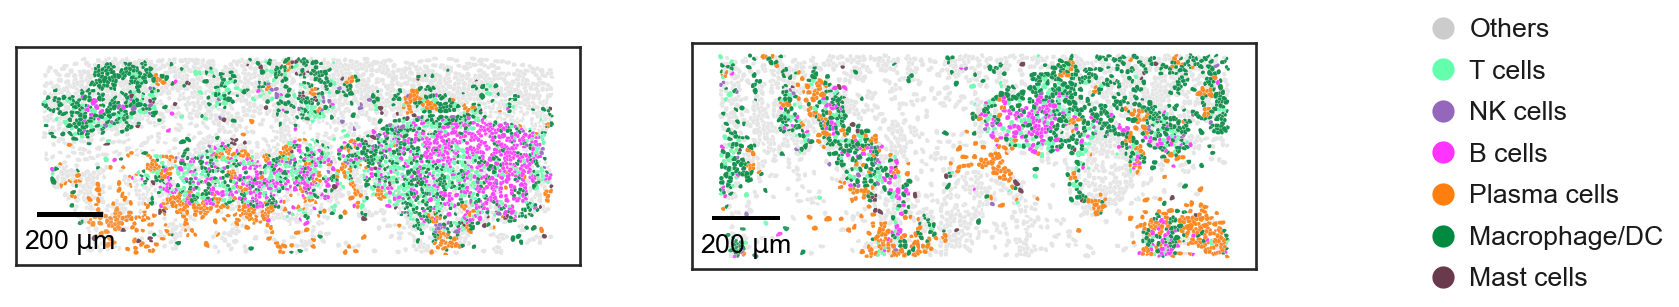

In [71]:
fig, axs =plt.subplots(figsize=(10, 3), ncols=2,nrows=1) 
axs = axs.flatten()

zone = {
'SLE2' : [13000, 16400, 16000, 17600], 
'DLE4' : [6000,15900,9100,17100]
}

samples = ['DLE4',"SLE2"]
for i, sample in enumerate(samples):
    sample_adata = ST_adata[ST_adata.obs['sample'] == sample]
    zone_adata = within(sample_adata, zone[sample], reduction='contour', inplace=True)
    ax = dimplot(zone_adata, reduction="contour", legend=False, ax=axs[i])
    dimplot(zone_adata, reduction="contour", groupby= 'celltype', order = Immu_cell, legend=False, ax=ax, palette=celltype_color)    
    draw_scalebar(ax=ax, location='lower left',color='black')
    sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)
plot_legend(fig=fig)

## Fig.4I

In [3]:
TLS_gene = pd.read_csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Gene_set.txt",sep='\t')
TLS_gene_sub = TLS_gene[TLS_gene['source'] == 'Wu_TLS']

/share/appspace_data/shared_groups/bgi_zhangzh_jszx/.conda/envs/py38/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:178: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


[16:17:39] ❕  ssat is not registered, register now                                           ]8;id=540500;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=978587;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#286\286]8;;\

/share/appspace_data/shared_groups/bgi_zhangzh_jszx/.conda/envs/py38/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:178: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


[16:17:42] ❕  ssat is not registered, register now                                           ]8;id=581272;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=678526;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#286\286]8;;\

/share/appspace_data/shared_groups/bgi_zhangzh_jszx/.conda/envs/py38/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:178: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


[16:17:46] ❕  ssat is not registered, register now                                           ]8;id=16900;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py\utils_20250718.py]8;;\:]8;id=552087;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure4/utils_20250718.py#286\286]8;;\

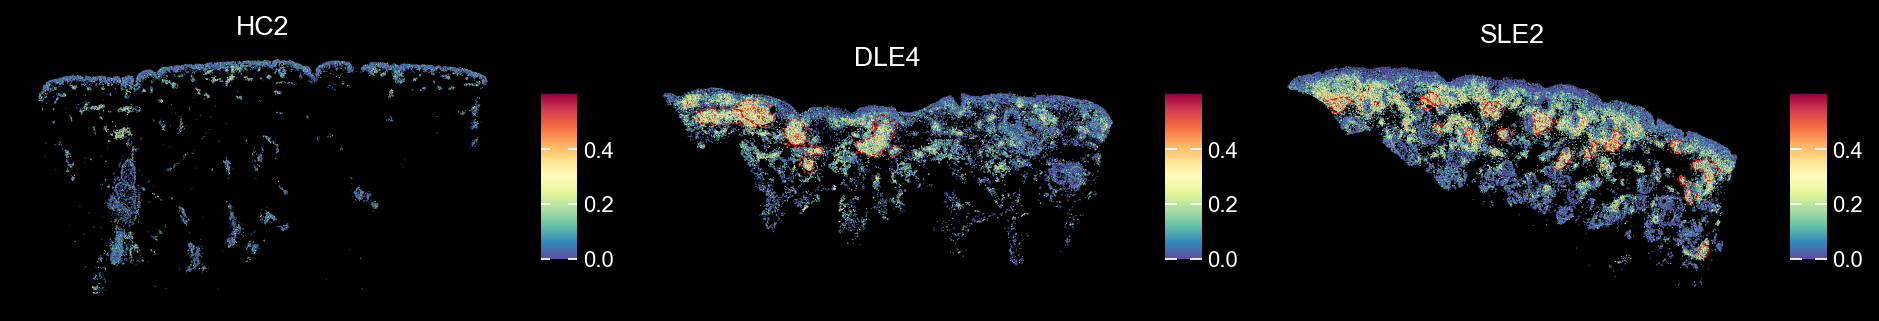

In [11]:
pdf_path = f"../../figures/Cellbin_TLS_score_spatial.pdf"
pdf = pdf_backend.PdfPages(pdf_path)

samples = ["HC2",'DLE4',"SLE2"]
with mpl.style.context('dark_background'):
    fig, axs = plt.subplots(
        nrows=1,
        ncols=3,
        figsize=(4 * len(samples), 4),
    )
    for i, sample in enumerate(samples): 
        ax = axs[i]
        sample_adata = ST_adata[ST_adata.obs['sample'] == sample]
        sc.tl.score_genes(sample_adata, TLS_gene_sub['gene'], score_name ='TLS_score',ctrl_size=100)
        ax = featureplot(sample_adata, 'TLS_score', reduction='spatial', dot_size=80, ax=ax,style='dark_background', vmin=0, vmax=0.6, vcenter=0.3)
        ax.set_title(sample)
        if samples[i] == 'DLE4' or samples[i] == 'SLE2':
            shp_TLS = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Cell_contour_shp/{sample}_cell_contour.shp")
            shp_TLS.plot(ax=ax,edgecolor='red',facecolor='none', linestyle='--', linewidth=0.5)
        ax.axis("off")
    plt.tight_layout(pad=1.0)
    plt.show()

    pdf.savefig(fig, bbox_inches='tight',dpi=300)
    plt.close(fig)
pdf.close()